# CREDIT CARD FRAUD DETECTION

<i>Build a machine learning model to identify fraudulent credit card transactions.Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.
Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine.</i>

# About Dataset

## Context:

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Content:

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\TUFAN\Downloads\codsoft\Credit_card_fraud_detection\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Information about the data frame

In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## checking for null values

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Checking for duplicate values

In [6]:
df.duplicated().sum()

1081

### removing the duplicate values

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

## Checking the distribution of legit and fraudulent transanctions

In [9]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

`Observations:`
- <i> 1 depicts fraudulent case and 0 depicts legit</i>
- <i>This dataset is highly unbalanced </i>

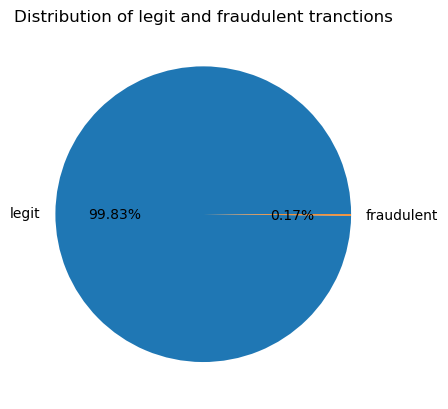

In [13]:
df['Class'].value_counts().plot(kind='pie',autopct="%1.2f%%",labels=['legit','fraudulent'])
plt.ylabel("")
plt.title("Distribution of legit and fraudulent tranctions")
plt.show()

## Seperating the data for analysis

In [18]:
fraud = df[df['Class']==1]
legit = df[df['Class']==0]

In [19]:
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [20]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


## statistical measure of the data

In [21]:
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [22]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

`Observation`
- The mean value of amount of transanction is higher in fraud case than in legit case

## Comparing the values of both transanctions

In [23]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


## Undersampling
- since the data is highly unbalanced
- build a sample dataset containing similar distribution of legit and fraud transanctions

In [24]:
legit_sample = legit.sample(n=473)

## Concatenating 2 dataframes

In [25]:
new_df = pd.concat([legit_sample,fraud],axis=0)

In [26]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
54009,46250.0,-0.810479,-0.384619,2.058426,0.571616,-0.870276,2.216838,0.260136,0.631226,0.212099,...,0.145463,0.483438,0.641791,-0.553461,-0.842805,1.250986,0.103782,0.132001,232.37,0
198193,132372.0,1.597220,-1.523291,-1.168096,-1.719281,-0.298728,0.927337,-0.735751,0.392829,2.014107,...,0.405862,1.066898,-0.035162,-1.589009,-0.361700,-0.058688,0.038919,-0.040651,183.02,0
21195,31530.0,-0.535189,0.069570,1.278819,-1.808871,-0.048863,-0.738597,0.203599,0.123140,-1.601514,...,-0.134318,-0.596697,0.227844,0.149612,-0.314835,-0.805355,0.256067,0.090128,23.85,0
19748,30524.0,-1.606668,-0.725397,0.791373,-2.197916,0.527121,-0.874499,-0.492134,0.698884,0.885804,...,0.040997,-0.233813,-0.090295,-0.276166,-0.272021,-0.344551,0.029787,-0.122657,1.70,0
251753,155484.0,2.048629,-0.367489,-2.544065,-0.728472,2.387380,3.318407,-0.477692,0.791276,0.403246,...,-0.292703,-0.835377,0.380780,0.698235,-0.265199,0.219159,-0.052337,-0.066750,1.98,0


In [28]:
new_df.shape

(946, 31)

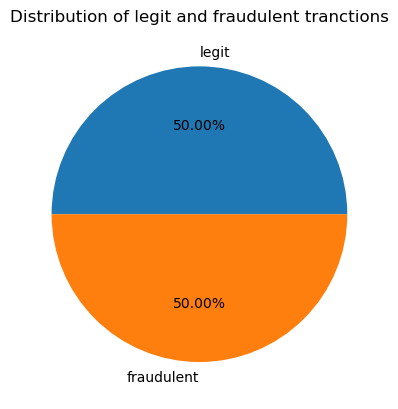

In [29]:
new_df['Class'].value_counts().plot(kind='pie',autopct="%1.2f%%",labels=['legit','fraudulent'])
plt.ylabel("")
plt.title("Distribution of legit and fraudulent tranctions")
plt.show()

In [30]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


- since the mean of the data before and after undersampling are similar, so we can conclude that our sample selection is right

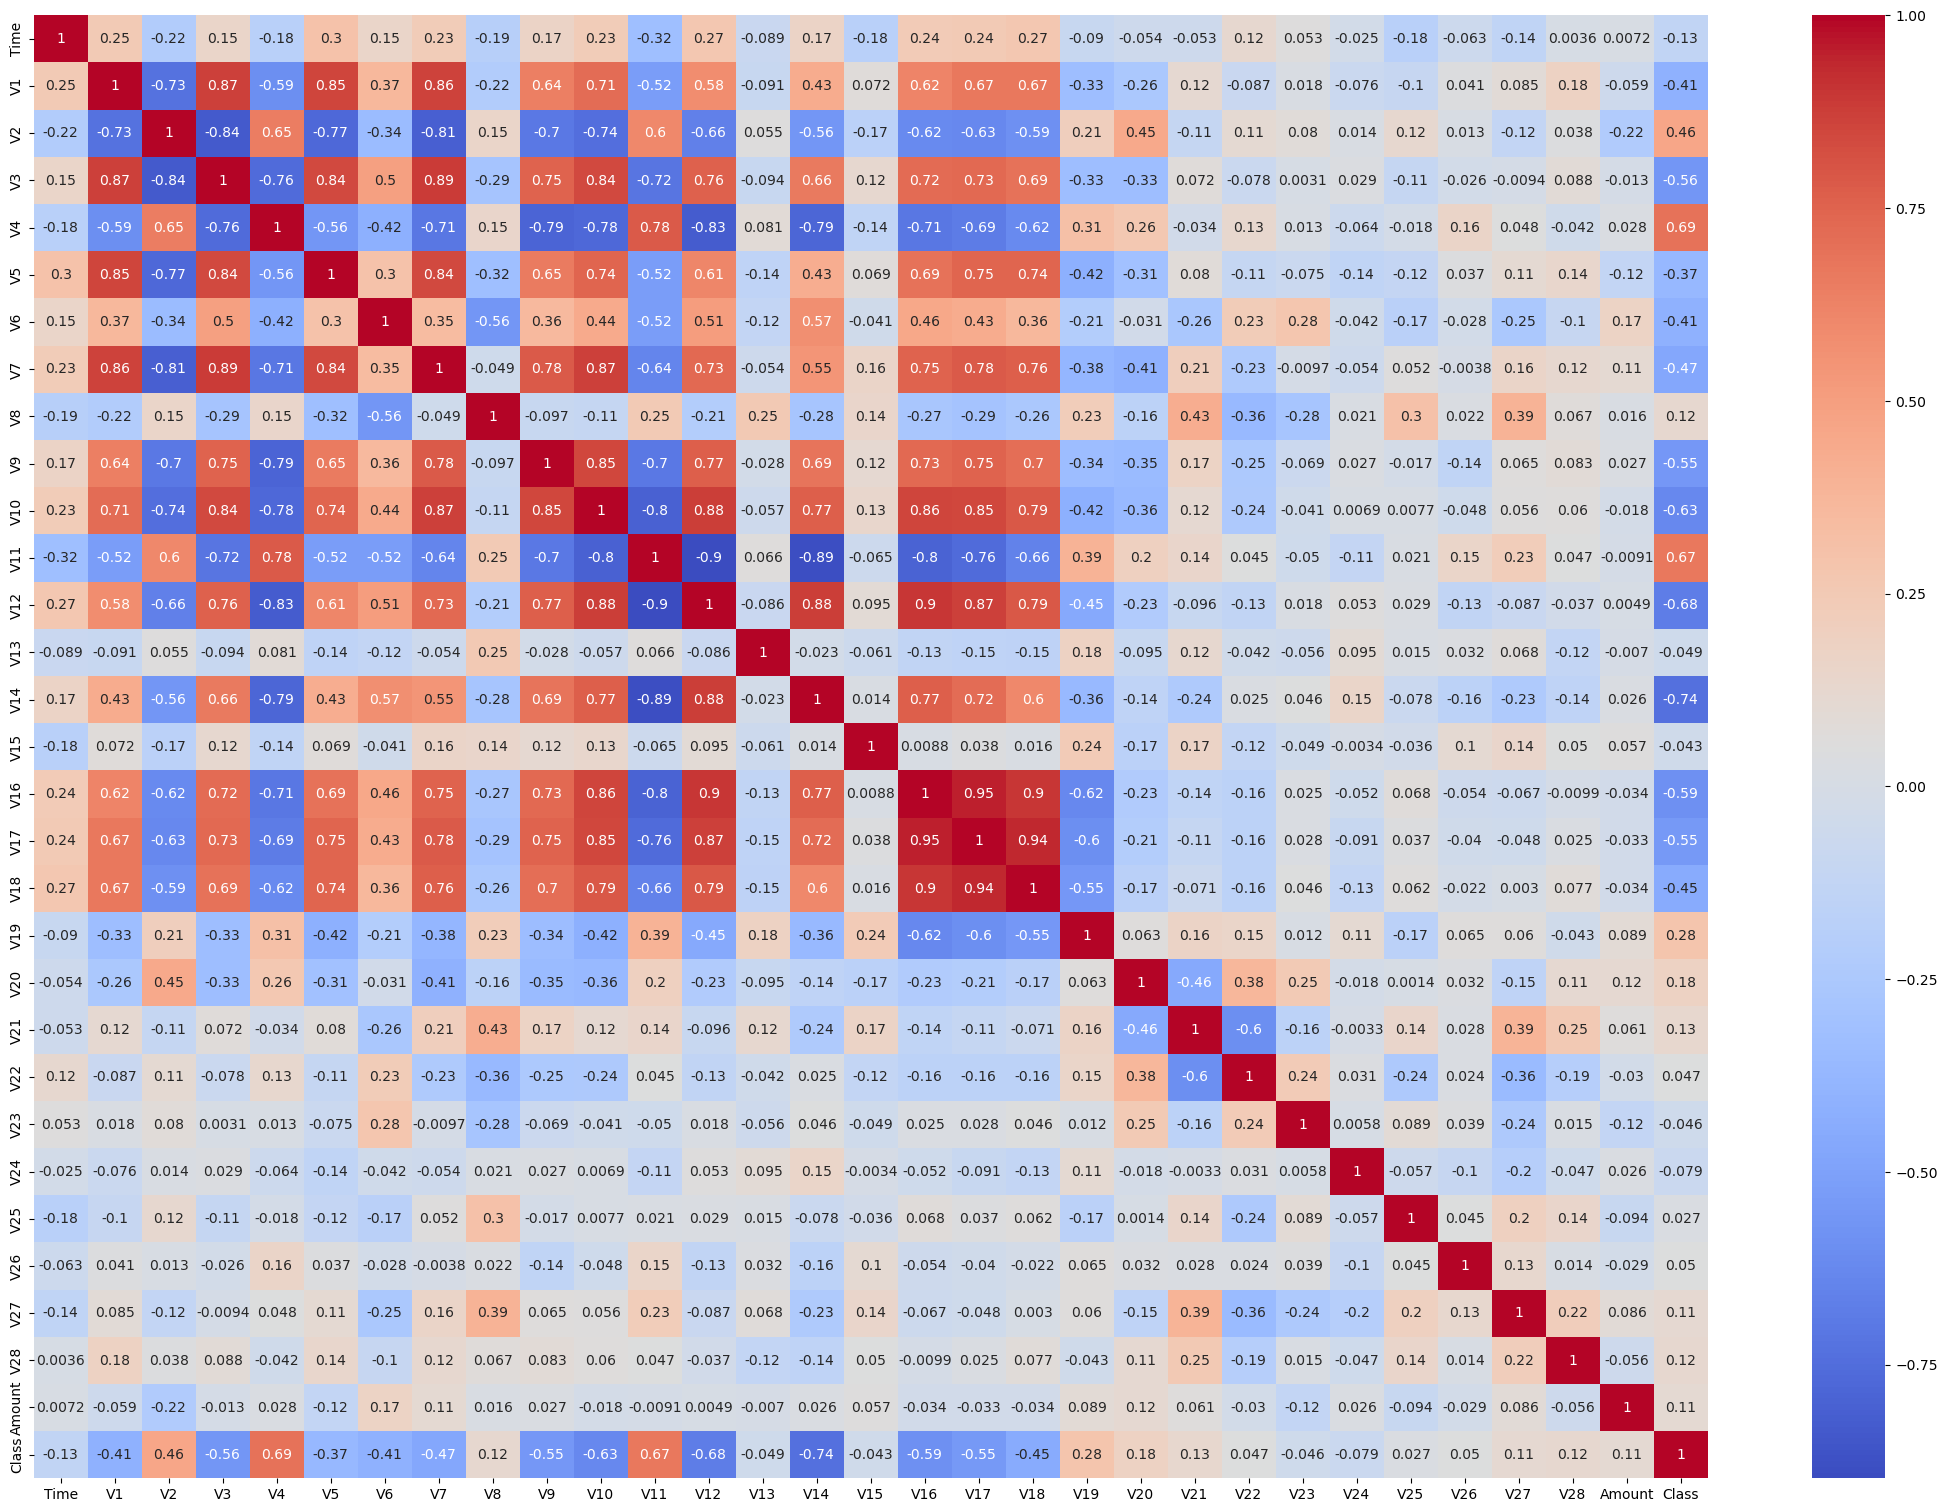

In [31]:
# plotting the heatmap for the correlation
plt.figure(figsize=(27,19))
sns.heatmap(new_df.corr(), cmap = 'coolwarm', annot= True )
plt.show()

## Splitting the data into features and target

In [32]:
x = new_df.drop(columns='Class',axis=1)
y = new_df['Class']

In [33]:
y

54009     0
198193    0
21195     0
19748     0
251753    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64

In [34]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
54009,46250.0,-0.810479,-0.384619,2.058426,0.571616,-0.870276,2.216838,0.260136,0.631226,0.212099,...,0.565040,0.145463,0.483438,0.641791,-0.553461,-0.842805,1.250986,0.103782,0.132001,232.37
198193,132372.0,1.597220,-1.523291,-1.168096,-1.719281,-0.298728,0.927337,-0.735751,0.392829,2.014107,...,0.073397,0.405862,1.066898,-0.035162,-1.589009,-0.361700,-0.058688,0.038919,-0.040651,183.02
21195,31530.0,-0.535189,0.069570,1.278819,-1.808871,-0.048863,-0.738597,0.203599,0.123140,-1.601514,...,0.221780,-0.134318,-0.596697,0.227844,0.149612,-0.314835,-0.805355,0.256067,0.090128,23.85
19748,30524.0,-1.606668,-0.725397,0.791373,-2.197916,0.527121,-0.874499,-0.492134,0.698884,0.885804,...,0.019978,0.040997,-0.233813,-0.090295,-0.276166,-0.272021,-0.344551,0.029787,-0.122657,1.70
251753,155484.0,2.048629,-0.367489,-2.544065,-0.728472,2.387380,3.318407,-0.477692,0.791276,0.403246,...,-0.152758,-0.292703,-0.835377,0.380780,0.698235,-0.265199,0.219159,-0.052337,-0.066750,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


## splitting the data into training and testing data

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,stratify=y,random_state=15)

## Model training

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

### Training the LR model with train data

In [37]:
model.fit(x_train,y_train)

LogisticRegression()

## Model evaluation

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Accuracy score

#### Accuracy of training data

In [41]:
y_train_pred = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train_pred,y_train)
print("Accuracy of training data:", training_data_accuracy*100,"%")

Accuracy of training data: 92.85714285714286 %


### Accuracy of test data

In [42]:
y_test_pred = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test_pred,y_test)
print("Accuracy of test data:",test_data_accuracy*100,"%")

Accuracy of test data: 90.0 %


### Plotting the accuracy of train and test data

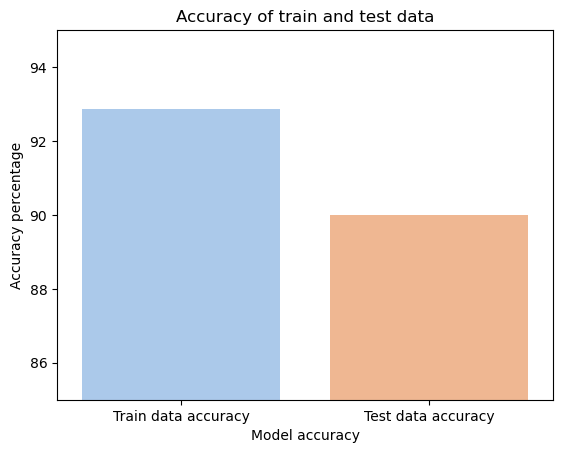

In [48]:
sns.barplot(y=[training_data_accuracy*100,test_data_accuracy*100],x=['Train data accuracy','Test data accuracy'],palette='pastel')
plt.title("Accuracy of train and test data")
plt.ylim(85,95)
plt.xlabel("Model accuracy")
plt.ylabel("Accuracy percentage")
plt.show()

### Confusion matrix

In [49]:
print(confusion_matrix(y_test,y_test_pred))

[[85 10]
 [ 9 86]]


### Classification report

In [50]:
print("Classification report:\n",classification_report(y_test,y_test_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90        95
           1       0.90      0.91      0.90        95

    accuracy                           0.90       190
   macro avg       0.90      0.90      0.90       190
weighted avg       0.90      0.90      0.90       190



# `Conclusion`

In this credit card fraud detection project, I tackled a highly imbalanced dataset, where fraudulent transactions represent a small fraction of the total transactions. My observations and findings are summarized below:

1. **Data Imbalance**: The dataset exhibited significant imbalance, with a much smaller proportion of fraudulent transactions compared to legitimate ones. This poses a challenge for modeling as it can bias the results towards the majority class (legit transactions).

2. **Transaction Amounts**: I observed that the mean transaction amount is higher in fraud cases than in legitimate cases. This suggests that fraudulent transactions tend to involve larger sums of money, which could be an important feature in detecting fraud.

3. **Data Handling**: To address the imbalance, I employed under-sampling of the legitimate transactions. This approach was used to balance the dataset and improve the model's ability to detect fraudulent transactions.

4. **Model Selection**: I utilized a logistic regression model for this classification task. Logistic regression was chosen for its simplicity and effectiveness in binary classification problems.

5. **Model Performance**:
   - **Training Data Accuracy**: 92.86%
   - **Test Data Accuracy**: 90.0%

The logistic regression model, combined with under-sampling, effectively distinguished between fraudulent and legitimate transactions, achieving high accuracy and balanced performance metrics. Future work could explore advanced resampling techniques and more complex models to further enhance detection capabilities.